In [1]:
import sys
sys.path.append("./src")

In [2]:
from src.agents.DuelingDQN import Actor, Critic
import src.trainer as trainer
import src.logger as logger
import src.agents.utils as AgentUtils
import time

In [3]:
# Control random values
import random
import torch
import numpy as np

SEED = 0
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [4]:
params = {
    "n_plays": 200000,   
    "lr_actor": 0.0001,
    "lr_critic": 0.0001,
    "save_agent": True,
    "debug": False,
}

start = time.time()

agent, _, path, results = trainer.train_a2c_agent(Actor, Critic, **params)

logger.print_time(start)

100%|██████████| 200000/200000 [3:59:27<00:00, 13.92it/s]      

Checkpoint saved to D:\Albert DC\Documents\UOC\__TFG\yahtzee-model\src\../models/Actor_2025-05-18_13-45-26
Training time: 03:59:27.95


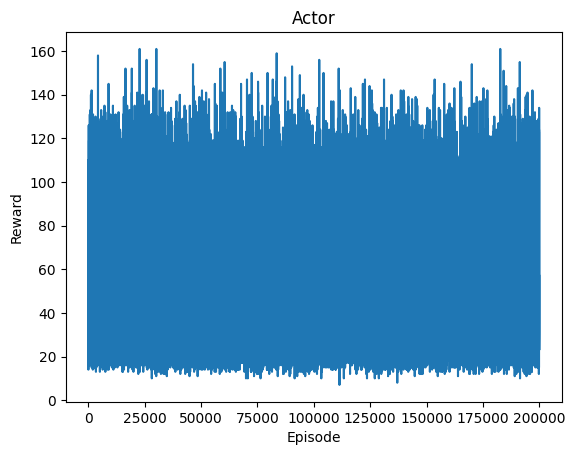

In [5]:
logger.print_train_results(results, agent.name)

In [7]:
# Evaluate agent
agent = AgentUtils.load_agent(path, Actor)

n_plays = 100
avg_score, median_score, scores = trainer.evaluate_model(agent, n_plays)
    
logger.print_eval_results(n_plays, avg_score, median_score)

100%|██████████| 100/100 [00:01<00:00, 55.24it/s]

Evaluation results:
Score over 100 games
Avg: 49.2, Median: 46.0
